In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("final_test.csv")
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
#checking missing values

df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [5]:
# Filling the missing values with the median
df['age'] = df ['age'].fillna(df['age'].median())
df['height'] = df ['height'].fillna(df['height'].median())

In [6]:
df.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [7]:
df.describe()

,weight,age,height
count,119734.000000,119734.000000,119734.000000
mean,61.756811,34.022959,165.803849
std,9.944863,8.141237,6.728462
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


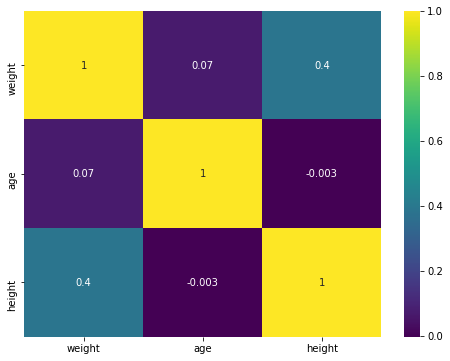

In [8]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis",);

In [9]:
df["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

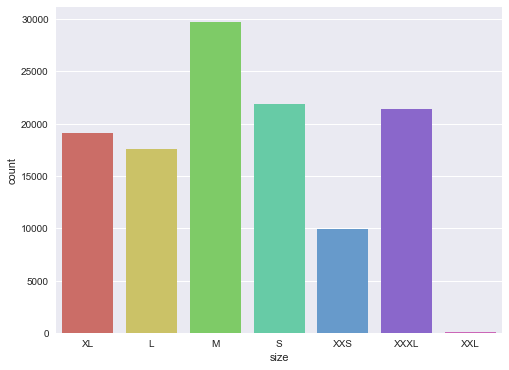

In [10]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x=df["size"], palette="hls");

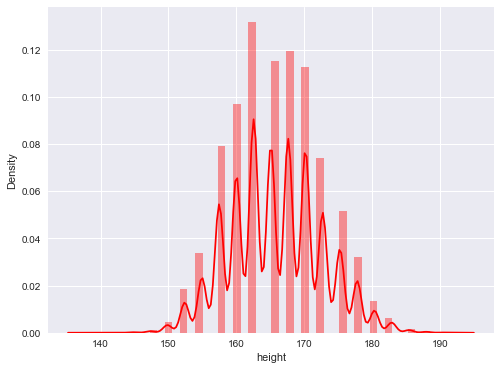

In [11]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["height"], color="r");

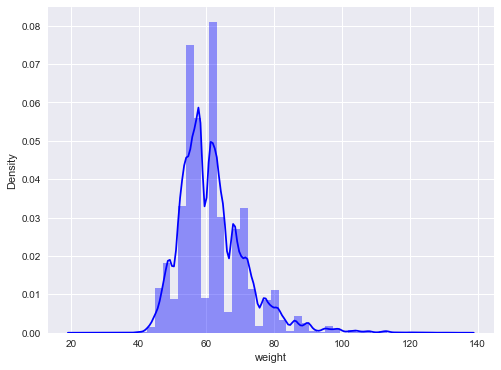

In [12]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["weight"], color="b");

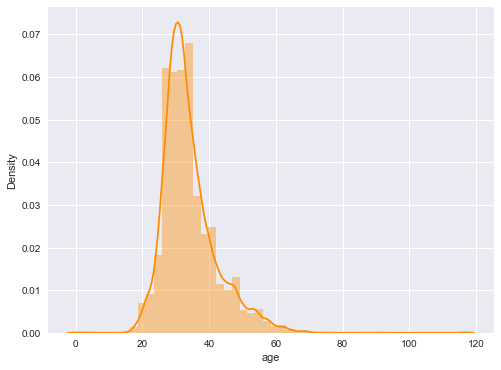

In [13]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["age"], color="darkorange");

In [14]:
df["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

In [15]:
df['size'] = df['size'].map({'XXS': 1, 'S': 2, "M" : 3, "L" : 4, "XL" : 5, "XXL" : 6, "XXXL" : 7})

In [16]:
# Having a look at the dataset after the numerical transformation
df.head()


,weight,age,height,size
0,62,28.0,172.72,5
1,59,36.0,167.64,4
2,61,34.0,165.10,3
3,65,27.0,175.26,4
4,62,45.0,172.72,3


In [17]:
# X data
X = df.drop("size", axis=1)

In [18]:
X.head()

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72


In [19]:
# y data
y = df["size"]
y.head()

0    5
1    4
2    3
3    4
4    3
Name: size, dtype: int64

In [20]:
# Splitting the data into X train, X test and y train, y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
len(X_train), len(X_test)

(95787, 23947)

In [22]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [23]:
clf.fit(X_train,y_train)

LinearRegression()

In [24]:
clf.predict(X_test)

array([1.33199125, 5.38526083, 4.13426698, ..., 3.24372437, 3.72483331,
       3.64077416])

In [25]:
LinearRegressionScore = clf.score(X_test,y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 64.90449857492906


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [27]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
model.predict(X_test)

array([1, 7, 5, ..., 3, 3, 3], dtype=int64)

In [29]:
np.array(y_test)

array([1, 5, 7, ..., 3, 3, 3], dtype=int64)

In [30]:
RandomForestClassifierScore = model.score(X_test,y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 51.15880903662254


In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(42)

In [32]:
clf1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=42)

In [33]:
clf1.predict(X_test)

array([1, 7, 5, ..., 3, 3, 3], dtype=int64)

In [34]:
np.array(y_test)

array([1, 5, 7, ..., 3, 3, 3], dtype=int64)

In [35]:
KNeighborsClassifierScore = clf1.score(X_test,y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 51.004301165072874


In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [37]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 50.57418465778595


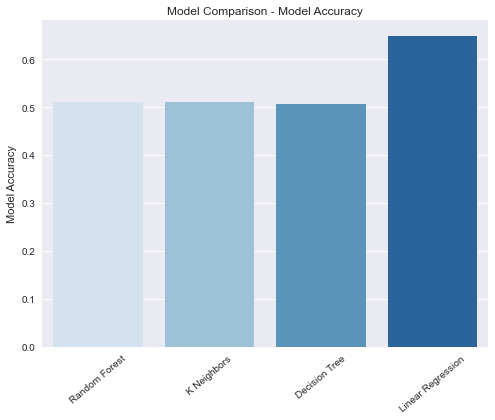

In [43]:
plt.style.use("seaborn")

x = ["Random Forest", 
     "K Neighbors", 
     "Decision Tree", 
     "Linear Regression"]

y = [RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     DecisionTreeClassifierScore, 
     LinearRegressionScore]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="Blues");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy");